In [17]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import epics
import time as ttime

%run -i lakeshore_comm.py

import csv
def load_input(file,dlm_char='\t',x_col=0,y_col=1):
    print('Input file is:\t', file,'\n\n')
    with open(file) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        x = []
        y = []

        for row in readCSV:
            #print(row)  #use just this line to figure out the delimiter  delete csv text in first line if not a number
            xx = float(row[0])
            yy = float(row[1])

            x.append(xx)
            y.append(yy)
        return x, y


# Calibration Table information
## US Sensor Thermistor J 2252 Ohm

This thermometer is an equivalent model of the thermistor used at CSX for DI water temperature control of optics. Only a  valid portion of the calibration 

## Usage recommendations:
The notebook needs write permission to epics.  One way to ensure this is to use a beamline workstation and execute the following commands before opening the notebook.
```shell
source activate collection
ipython notebook
```

The Lakeshore 336 calibration tables 21 - 59 are reserved for users.  First check to make sure that you are not about to overwrite a calibration. The temperature column should be in decreasing order.

In [18]:
input_data = load_input('USsensor_J_2252_calcurve.csv',',')


Input file is:	 USsensor_J_2252_calcurve.csv 




In [19]:
print(len(input_data[0]))

2401


In [20]:
tempC = np.array(input_data[0])[1260:-941]
r= np.array(input_data[1])[1260:-941]
tempK = tempC + 273.15

print(tempK.shape)

print(29.6+273-4)
print(34+273)

(200,)
298.6
307


<IPython.core.display.Javascript object>


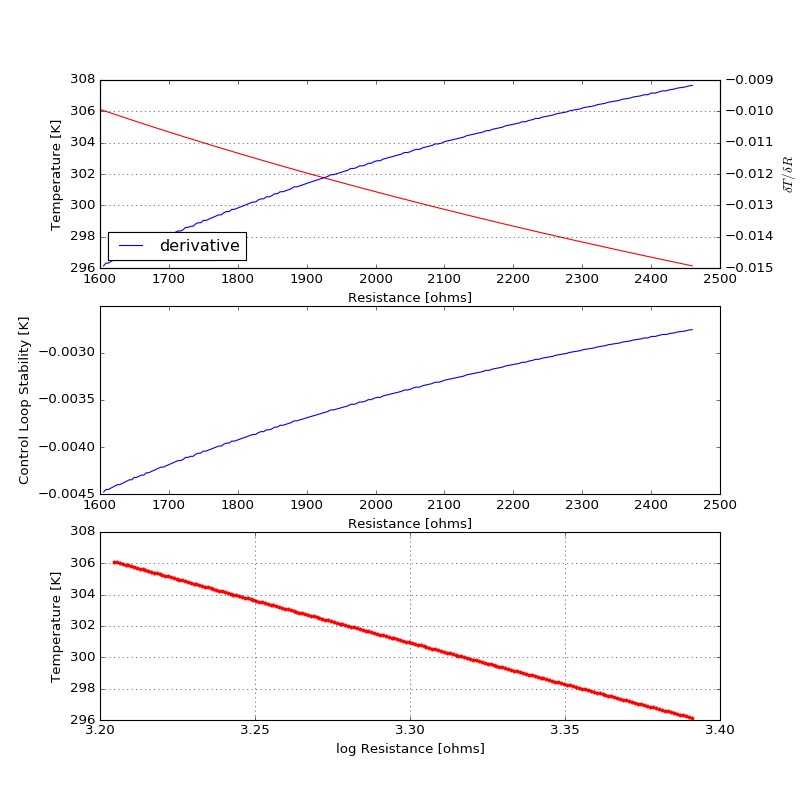

In [21]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax1 = ax[0]
ax1.plot(r, tempK, 'r-',label='R vs T')
ax1.set_ylabel('Temperature [K]')
plt.grid(True)
ax1.legend(loc=3)
ax2 = ax1.twinx()
ax2.plot(r[:-1], np.diff(tempK) / np.diff(r), 'b-',label='derivative')
ax2.set_ylabel('$\delta T / \delta R$')
ax1.set_xlabel('Resistance [ohms]')
ax2.legend(loc=5)


ax1 = ax[1]
ax1.plot(r[:-1], 0.3 * np.diff(tempK) / np.diff(r))
ax1.set_ylabel('Control Loop Stability [K]')
ax1.set_xlabel('Resistance [ohms]')
plt.grid(True)

ax1 = ax[2]
ax1.plot(np.log10(r), tempK, 'r.-',label='log(R) vs T')
ax1.set_ylabel('Temperature [K]')
ax1.set_xlabel('log Resistance [ohms]')
plt.grid(True)
plt.legend(loc=3)




## Create data to upload
This sensor is designed to upload log(R)


In [22]:
tempK_r = tempK[::-1]
r_r = r[::-1]

In [23]:
t = tempK_r
r = r_r
op = lakeshore_curv(32, 'TH-J-2252', np.log10(r), t,4, sn='STD')
op

307 is the configured maximum temperature for extrapolation


['CRVDEL 32',
 'CRVHDR 32,TH-J-2252,STD,4,307,1',
 'CRVPT 32,1,3.20462,306.1',
 'CRVPT 32,2,3.20553,306.05',
 'CRVPT 32,3,3.20644,306',
 'CRVPT 32,4,3.20735,305.95',
 'CRVPT 32,5,3.20826,305.9',
 'CRVPT 32,6,3.20917,305.85',
 'CRVPT 32,7,3.21008,305.8',
 'CRVPT 32,8,3.21099,305.75',
 'CRVPT 32,9,3.2119,305.7',
 'CRVPT 32,10,3.21281,305.65',
 'CRVPT 32,11,3.21372,305.6',
 'CRVPT 32,12,3.21463,305.55',
 'CRVPT 32,13,3.21555,305.5',
 'CRVPT 32,14,3.21646,305.45',
 'CRVPT 32,15,3.21737,305.4',
 'CRVPT 32,16,3.21829,305.35',
 'CRVPT 32,17,3.2192,305.3',
 'CRVPT 32,18,3.22011,305.25',
 'CRVPT 32,19,3.22103,305.2',
 'CRVPT 32,20,3.22194,305.15',
 'CRVPT 32,21,3.22285,305.1',
 'CRVPT 32,22,3.22377,305.05',
 'CRVPT 32,23,3.22468,305',
 'CRVPT 32,24,3.2256,304.95',
 'CRVPT 32,25,3.22651,304.9',
 'CRVPT 32,26,3.22743,304.85',
 'CRVPT 32,27,3.22835,304.8',
 'CRVPT 32,28,3.22926,304.75',
 'CRVPT 32,29,3.23018,304.7',
 'CRVPT 32,30,3.23109,304.65',
 'CRVPT 32,31,3.23201,304.6',
 'CRVPT 32,32,3.23293

In [15]:
ls_pv = 'XF:02ID-OP{TCtrl:1}' 

In [16]:
put_data(ls_pv,op)

In [101]:
np.log10(1863.88)

3.2704179482457345